<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Python em Ciência de Dados/Árvores I/data_for_sklearn.csv')
data.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
3,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
4,0,27.482192,4.024658,1,0,1,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   bool   
 10  posse_de_veiculo_Y                      6770 non-null   bool

In [5]:
# Separe 70% da base para treinamento e 30% para testes
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from IPython import get_ipython
from IPython.display import display


X = data.drop('mau', axis=1)
y = data['mau']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4739, 28), (2031, 28), (4739,), (2031,))

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
# Defina um objeto com a função da árvore de decisão vista em aula.
tree = DecisionTreeClassifier(max_depth=3, random_state=100)

# Treine o modelo com os dados que você separou para treinamento.
tree.fit(X_train, y_train)
tree

DecisionTreeClassifier(max_depth=3, random_state=100)

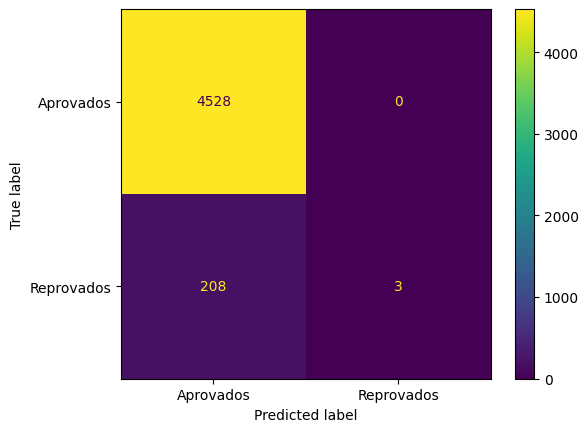

In [15]:
# Produza uma visualização da matriz de classificação (ou matriz de confusão)
# coloque os rótulos como "aprovados" e "reprovados"
cm_train = confusion_matrix(y_train, tree.predict(X_train), labels=tree.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()


In [8]:
# Calcule a acurácia na base de treinamento
accuracy_score(y_train, tree.predict(X_train))

0.9561088837307449

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [16]:
# Classifique a base de teste de acordo com a árvore que você treinou no item 2
y_pred = tree.predict(X_test)
y_pred[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

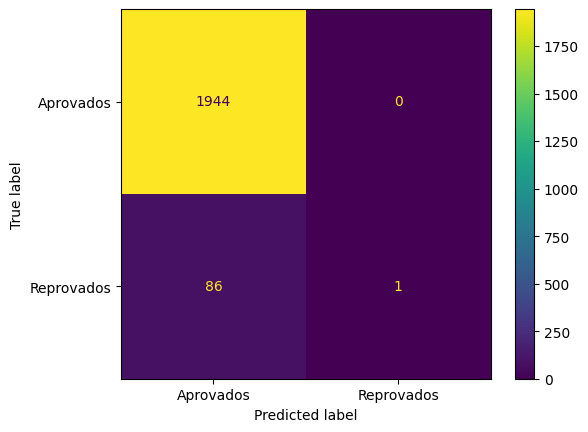

In [17]:
# Produza a visualização da matriz de confusão para a base de teste
cm_teste = confusion_matrix(y_test, tree.predict(X_test), labels=tree.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_teste, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot();

In [18]:
# Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento
accuracy_score(y_test, tree.predict(X_test))

0.9576563269325455

In [19]:
# Compare com a acurácia da base de treinamento
print(f"Acurácia na base de treinamento: {accuracy_score(y_train, tree.predict(X_train)):.2f}")
print(f"Acurácia na base de teste: {accuracy_score(y_test, tree.predict(X_test)):.2f}")
print(f"A diferença entre as acuracias de treinamento - teste foi mínima, de: {accuracy_score(y_train, tree.predict(X_train)) - accuracy_score(y_test, tree.predict(X_test))}")

Acurácia na base de treinamento: 0.96
Acurácia na base de teste: 0.96
A diferença entre as acuracias de treinamento - teste foi mínima, de: -0.001547443201800669


**Precebe-se que acurácias são similares, onde sugere que o modelo está generalizando bem.**

In [14]:
# Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123.
tree2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

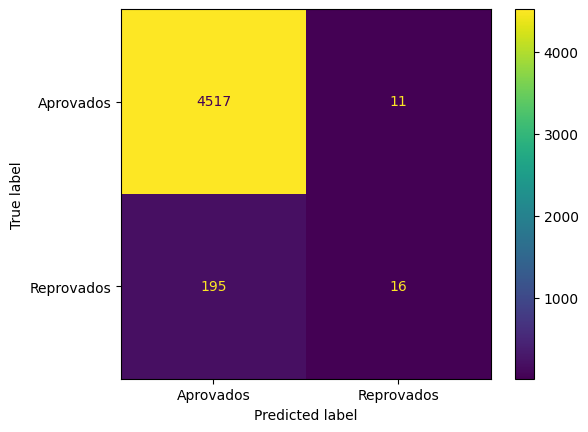

In [20]:
# Produza a visualização da matriz de confusão
cm_train_2 = confusion_matrix(y_train, tree2.predict(X_train), labels=tree2.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_train_2, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot();

In [24]:
# ACURACIA
print(f"Acurácia na base de treinamento: {accuracy_score(y_train, tree2.predict(X_train)):.2f}")
print(f"Acurácia na base de teste: {accuracy_score(y_test, tree2.predict(X_test)):.2f}")

Acurácia na base de treinamento: 0.96
Acurácia na base de teste: 0.95


In [26]:
# Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
print(f"Acurácia classificando todos como 'bons': {accuracy_score(y_test, np.zeros(len(y_test))):.2f}")

Acurácia classificando todos como 'bons': 0.96
